## Understanding geopandas
Many data analysis scenarios deal with geographical data such a population distribution in different states of United States, sales across different stores in a particular country, etc. Geopandas is a useful dataframe tool to handle such data. The principal advantage of using geopandas is that it provides a geometry column which contains gemoetrical information for a given row. It also enables visualizing your results on a map. So let us see an example of how this all works.

In [1]:
# Import all the relevant libraries
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

I have already stored a .geojson file that contains gemoetry information about different states of India obtained from https://groups.google.com/forum/#!topic/datameet/dZ96g7ngWAg. You can usually find .geojson files for different countries of regions by few google searches. The directory also contains another dataset obtained from kaggle https://www.kaggle.com/rajanand/education-in-india/data, which contains population, area, education information for different states. The aim is to visualize this results on an indian map. Note that there is some data clean up that has to be done for this to work. You should have a primary key, name of state in our case, which should be same in both dataframes.

In [2]:
%ls

Geopandas.ipynb       India_data.csv        india_states.geojson


First let us read the .geojson file to a geopanda dataframe object named india_map, and see how it looks.

In [3]:
# read the geojson file that contains coordinates of indian states
# It is stored as a dataframe object and you can apply all the pandas dataframe functions on it
india_map = gpd.read_file('india_states.geojson')
india_map.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,filename,filename_1,filename_2,filename_3,filename_4,geometry
0,105,IND,India,1,Andaman and Nicobar,,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,,,,,,"(POLYGON ((93.787727 6.85264, 93.78849 6.85257..."
1,105,IND,India,2,Andhra Pradesh,,,State,State,,,,,,"(POLYGON ((80.274582 13.459583, 80.274582 13.4..."
2,105,IND,India,3,Arunachal Pradesh,,Agence de la Frontire du Nord-Est(French-obsol...,State,State,,,,,,"POLYGON ((96.157776 29.383101, 96.163803 29.37..."
3,105,IND,India,4,Assam,,,State,State,,,,,,"(POLYGON ((89.87145200000001 25.537298, 89.871..."
4,105,IND,India,5,Bihar,,,State,State,,,,,,"(POLYGON ((88.105476 26.53904, 88.105048999999..."


Though the data contains lot of columns that are unnecassary (this is normal when you download a data from internet!!), it contains names of states in column 'Name_1' and the coordinates of each state in 'geometry'. Let us check the type of this data, and convince ourselves that it is indeed a dataframe object

In [4]:
# Check the type of the dataframe object
type(india_map)

geopandas.geodataframe.GeoDataFrame

As we don't need all the columns, we will only save the columns 'Name_1' and 'geometry' and also rename 'Name_1' as 'statname'.

In [5]:
# Let us only save the columns Name 1 and geometry, and rename Name 1 and statname
india_map = india_map[['NAME_1','geometry']]
india_map.rename(columns={'NAME_1':'statname'},inplace=True)
india_map.head()

,statname,geometry
0,Andaman and Nicobar,"(POLYGON ((93.787727 6.85264, 93.78849 6.85257..."
1,Andhra Pradesh,"(POLYGON ((80.274582 13.459583, 80.274582 13.4..."
2,Arunachal Pradesh,"POLYGON ((96.157776 29.383101, 96.163803 29.37..."
3,Assam,"(POLYGON ((89.87145200000001 25.537298, 89.871..."
4,Bihar,"(POLYGON ((88.105476 26.53904, 88.105048999999..."


Now we have succesfully read and cleaned the geojson file into a geopanda dataframe object. We can even plot this data!

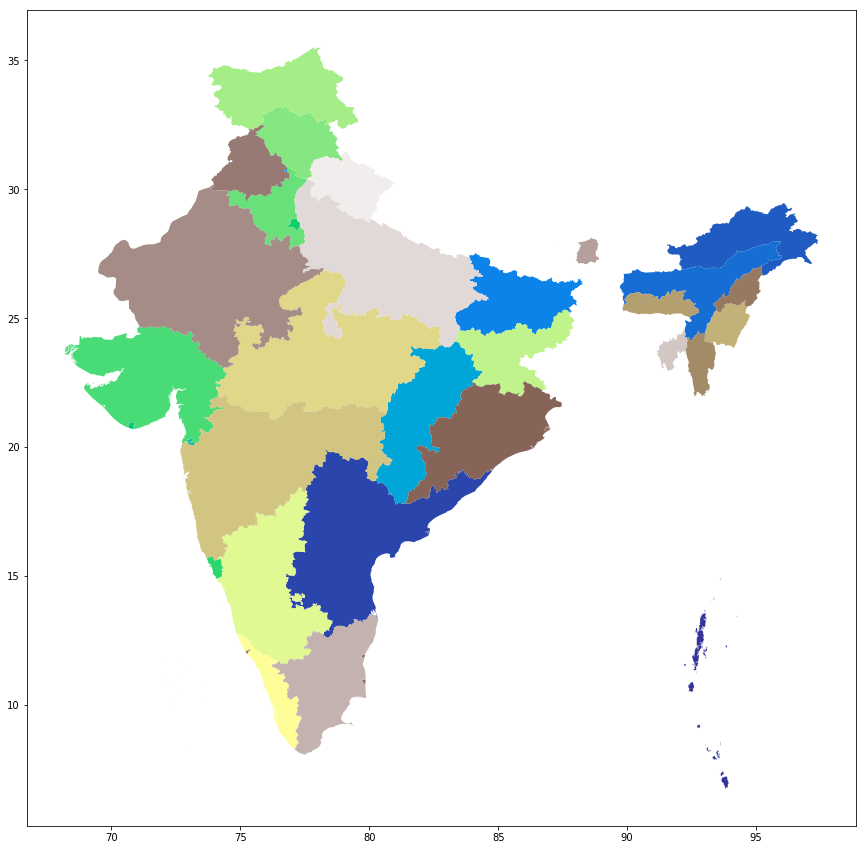

In [6]:
# Plot the data using a random colormap
india_map.plot(figsize=(15,15),cmap='terrain')

Its time to read the second dataset 'India_data.csv'. This is the dataset one would like to visualize on a map. 

In [7]:
# Now let us read another database which contains statewise population of India, along with growth_rate, area, etc. 
data = pd.read_csv('India_data.csv')
data.head()

,ac_year,statcd,statname,area_sqkm,tot_population,urban_population,grwoth_rate,sexratio,sc_population,st_population,...,tchmed_nr,tchoth_nr,tchse_nr,tchnr_nr,enrc7_py,enrc8_py,enrc9_py,enrc10_py,enr11_py,enr12_py
0,2015-16,1,Jammu and Kashmir,222236.0,12548.93,20.05,23.71,883.0,7.4,11.9,...,0,0,0,0,199954,203537,192567,146066,138963,116187
1,2015-16,2,Himachal Pradesh,55673.0,6856.51,8.69,12.81,974.0,25.2,5.7,...,0,0,0,0,122101,122413,130258,135253,119932,98924
2,2015-16,3,Punjab,50362.0,27704.24,29.82,13.73,893.0,31.9,0.0,...,0,0,0,0,481982,473349,451412,426034,351639,342835
3,2015-16,4,Chandigarh,114.0,1054.69,76.66,17.10,818.0,18.9,0.0,...,0,0,0,0,21344,21321,21545,16708,20948,17943
4,2015-16,5,Uttarakhand,53483.0,10116.75,21.54,19.17,963.0,18.8,2.9,...,0,0,0,0,193393,193890,197590,200769,150799,162100


It contains several information. For this example, we will only consider the total population which is in the column 'tot_population'. Thus we will modify the data_pop dataframe to contain only the 'statname' and 'tot_population'.

In [8]:
# We will keep only the columns statname and tot_population and drop any nan values
data_pop = data[['statname','tot_population']].dropna()
data_pop

,statname,tot_population
0,Jammu and Kashmir,12548.93
1,Himachal Pradesh,6856.51
2,Punjab,27704.24
3,Chandigarh,1054.69
4,Uttarakhand,10116.75
5,Haryana,25353.08
6,Delhi,16753.24
7,Rajasthan,68621.01
8,Uttar Pradesh,199581.48
9,Bihar,103804.64


The power of geopandas is that it allows us to merge the two dataframes based on a primary key, similar to any pandas dataframe. Let us do it!

In [9]:
# The best part of geopandas is you can use to merge with other pandas dataframe
# Here we will merge popoulation data 
india_map_pop = india_map.merge(data_pop,on='statname')

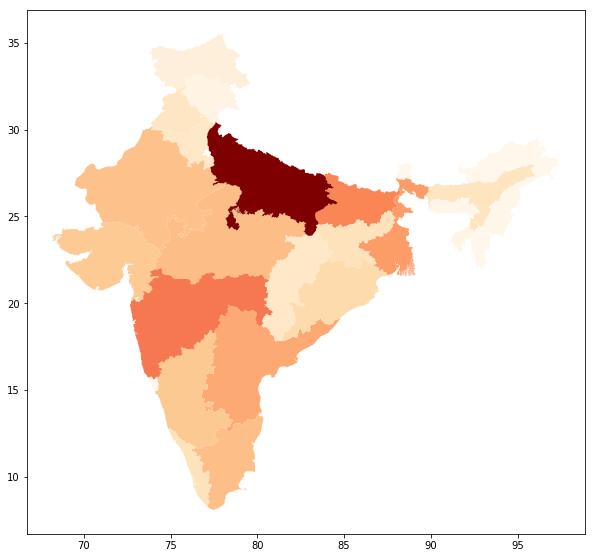

In [10]:
# Now you can visualize the demography distribution of different states differentiated by colors.
plot1 = india_map_pop.plot(column='tot_population',figsize=(10,10),cmap = 'OrRd')

In this manner, one can visualize their data which is dependent on geography by plotting it over a map. 
Geopandas also provides other functionalities such as verifying whether a point lies in a particular geometry, distance between points, area of a geometry, etc. Let us see an example, where we would like to know which state does a city Bangalore belong to using the function 'contains'.

In [25]:
# Geopandas also provide a lot of useful functions.
# One such function is to check if a point falls in a particular polygon
# Here, we will use this to check what state does bangalore belong to
from shapely.geometry import Point,Polygon
bangalore = Point(77.580643,12.972442)
type(bangalore)

shapely.geometry.point.Point

In [26]:
india_map.contains(bangalore)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

In [27]:
state_bangalore = india_map[india_map.contains(bangalore)]

In [28]:
state_bangalore

,statname,geometry
16,Karnataka,"(POLYGON ((74.670975 13.199862, 74.670975 13.1..."


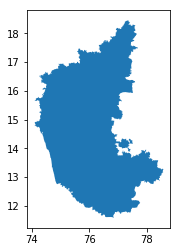

In [29]:
state_bangalore.plot()

Thus we have correctly found that Bangalore belongs to Karnataka and have also plotted the geometry of this state. This was just a basic introduction to geopandas for visualization purpose. You can check out more functions and methods, along with documentation at http://geopandas.org/index.html.